In [22]:
!pip install torch torchvision torchaudio

In [23]:
!pip install -r requirements.txt

In [10]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [27]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/yehoon/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-3-19 Python-3.13.1 torch-2.6.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [28]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [29]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [30]:
result = model(img)
result.print()

/Users/yehoon/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 3459.6ms pre-process, 71.5ms inference, 9.3ms NMS per image at shape (1, 3, 384, 640)


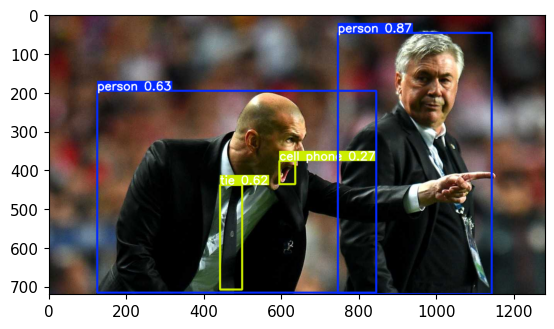

In [31]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [32]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()

    results = model(frame)
    
    cv2.imshow('Yolo', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

2025-03-20 23:04:46.998 Python[5452:181342] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
/Users/yehoon/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/yehoon/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/yehoon/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/yehoon/.cache/torch/hub/ultralytics_yolov5_master/models/commo

In [33]:
#Train from scratch
import uuid
import os
import time

IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection', frame)
        time.sleep(2)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)
        


In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg &&  pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
 # 6 Load model

In [ ]:
# 인증서 문제 해결
!pip install certifi

In [1]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weight yolov5s.pt --workers 2

Using cache found in /Users/yehoon/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-3-20 Python-3.13.1 torch-2.6.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: skipping check (not a git repository), for updates see https://github.com

In [4]:
import ssl
import certifi
import torch

# SSL 설정을 올바르게 수정
ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())

model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/yehoon/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-3-21 Python-3.13.1 torch-2.6.0 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [5]:
import os

In [6]:
img = os.path.join('data', 'images', 'drowsy.e4eaaea0-055d-11f0-b28d-0a511fcb4cd7.jpg')

In [7]:
result = model(img)

/Users/yehoon/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [8]:
result.print()

image 1/1: 1080x1920 1 drowsy
Speed: 36.5ms pre-process, 68.2ms inference, 0.8ms NMS per image at shape (1, 3, 384, 640)


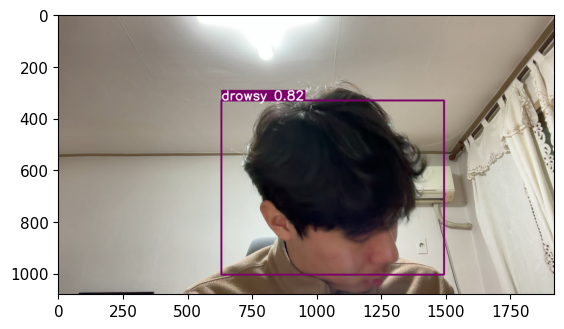

In [11]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [12]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    result = model(frame)
    cv2.imshow('yolo', np.squeeze(result.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[03/21 02:09:35.453284][info][352221][Context.cpp:69] Context created with config: default config!
[03/21 02:09:35.453329][info][352221][Context.cpp:74] Context work_dir=/Users/yehoon/Desktop/project/SleepShield
[03/21 02:09:35.453331][info][352221][Context.cpp:77] 	- SDK version: 1.9.4
[03/21 02:09:35.453332][info][352221][Context.cpp:78] 	- SDK stage version: main
[03/21 02:09:35.453336][info][352221][Context.cpp:82] get config EnumerateNetDevice:false
[03/21 02:09:35.453340][info][352221][MacPal.cpp:36] createObPal: create MacPal!
[03/21 02:09:35.454359][info][352221][MacPal.cpp:104] Create PollingDeviceWatcher!
[03/21 02:09:35.454376][info][352221][DeviceManager.cpp:15] Current found device(s): (0)
[03/21 02:09:35.454381][info][352221][Pipeline.cpp:15] Try to create pipeline with default device.
[03/21 02:09:35.454383][warning][352221][ObException.cpp:5] No device found, fail to create pipeline!
[03/21 02:09:35.456068][info][352221][Context.cpp:90] Context destroyed


OpenCV: out device of bound (0-0): 1
OpenCV: camera failed to properly initialize!
[ WARN:0@310.286] global cap.cpp:323 open VIDEOIO(OBSENSOR): raised unknown C++ exception!




AttributeError: 'cv2.VideoCapture' object has no attribute 'destroyAllWindows'